In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pickle
from ramannoodles import spectrafit
from ramannoodles import shoyu

In [3]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMIC ACID',
 'WATER']

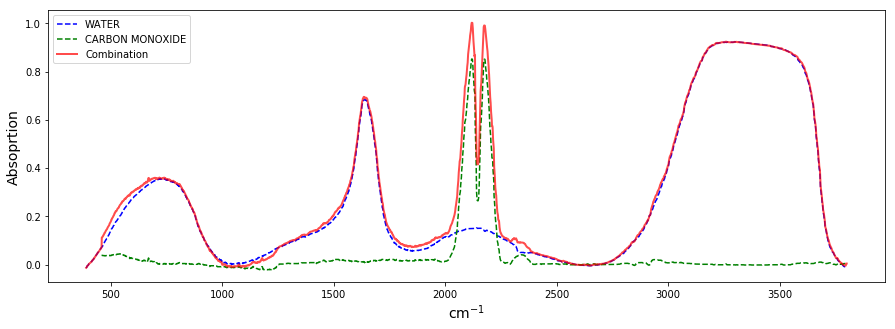

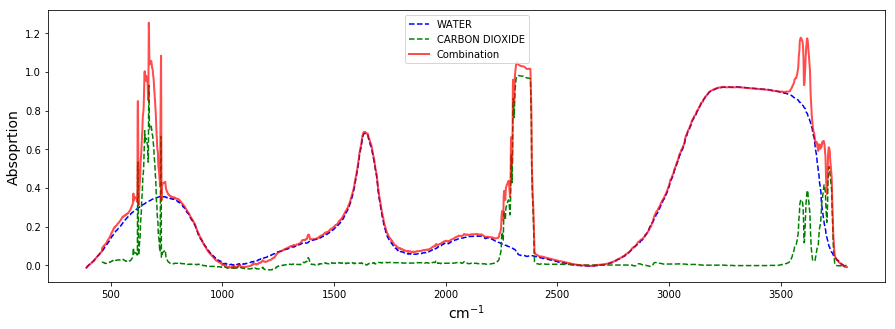

In [5]:
compound_1 = shoyu_data_dict['WATER']
compound_2 = shoyu_data_dict['CARBON MONOXIDE']
compound_3 = shoyu_data_dict['ETHYL ALCOHOL']
compound_4 = shoyu_data_dict['FORMIC ACID']
compound_5 = shoyu_data_dict['CARBON DIOXIDE']
H2O_CO_x, H2O_CO_y = shoyu.combine_spectra(compound_1, compound_2, plot = True)
H2O_CO2_x, H2O_CO2_y = shoyu.combine_spectra(compound_1, compound_5, plot = True)

In [7]:
H2O_CO_x = np.asarray(H2O_CO_x)
H2O_CO_y = np.asarray(H2O_CO_y)
H2O_CO2_x = np.asarray(H2O_CO2_x)
H2O_CO2_y = np.asarray(H2O_CO2_y)

In [8]:
water_peaks = spectrafit.compound_report(compound_1)[0]
co_peaks = spectrafit.compound_report(compound_2)[0]
co2_peaks = spectrafit.compound_report(compound_5)[0]
H2O_CO_peaks = spectrafit.data_report(H2O_CO_x, H2O_CO_y)[0]
H2O_CO2_peaks = spectrafit.data_report(H2O_CO2_x, H2O_CO2_y)[0]

In [9]:
def compare_unknown_to_known(combined_spectrum, known_spectrum, precision = 0.03):
    assignment_matrix = np.zeros(len(combined_spectrum))
    peaks_found = 0
    for i in range(len(combined_spectrum)):
        for j in range(len(known_spectrum)):
            #instead of If, call peak_1D_score
            if math.isclose(combined_spectrum[i], known_spectrum[j], rel_tol = precision):
                #Instead of using a 1, just input the score from the score calculator. Bigger is better.
                #Storing only the second component in the list. 
                assignment_matrix[i] = 1
                peaks_found += 1
                continue
            else:
                pass
        if peaks_found == len(known_spectrum):
            continue
        else:
            pass
    return assignment_matrix

In [10]:
#Start with the H2O, CO spectra
water_assignment_matrix = compare_unknown_to_known(H2O_CO_peaks, water_peaks, 0.02)
co_assignment_matrix = compare_unknown_to_known(H2O_CO_peaks, co_peaks, 0.02)
print(water_assignment_matrix)
print(co_assignment_matrix)

[1. 1. 0. 0. 1.]
[0. 0. 1. 1. 0.]


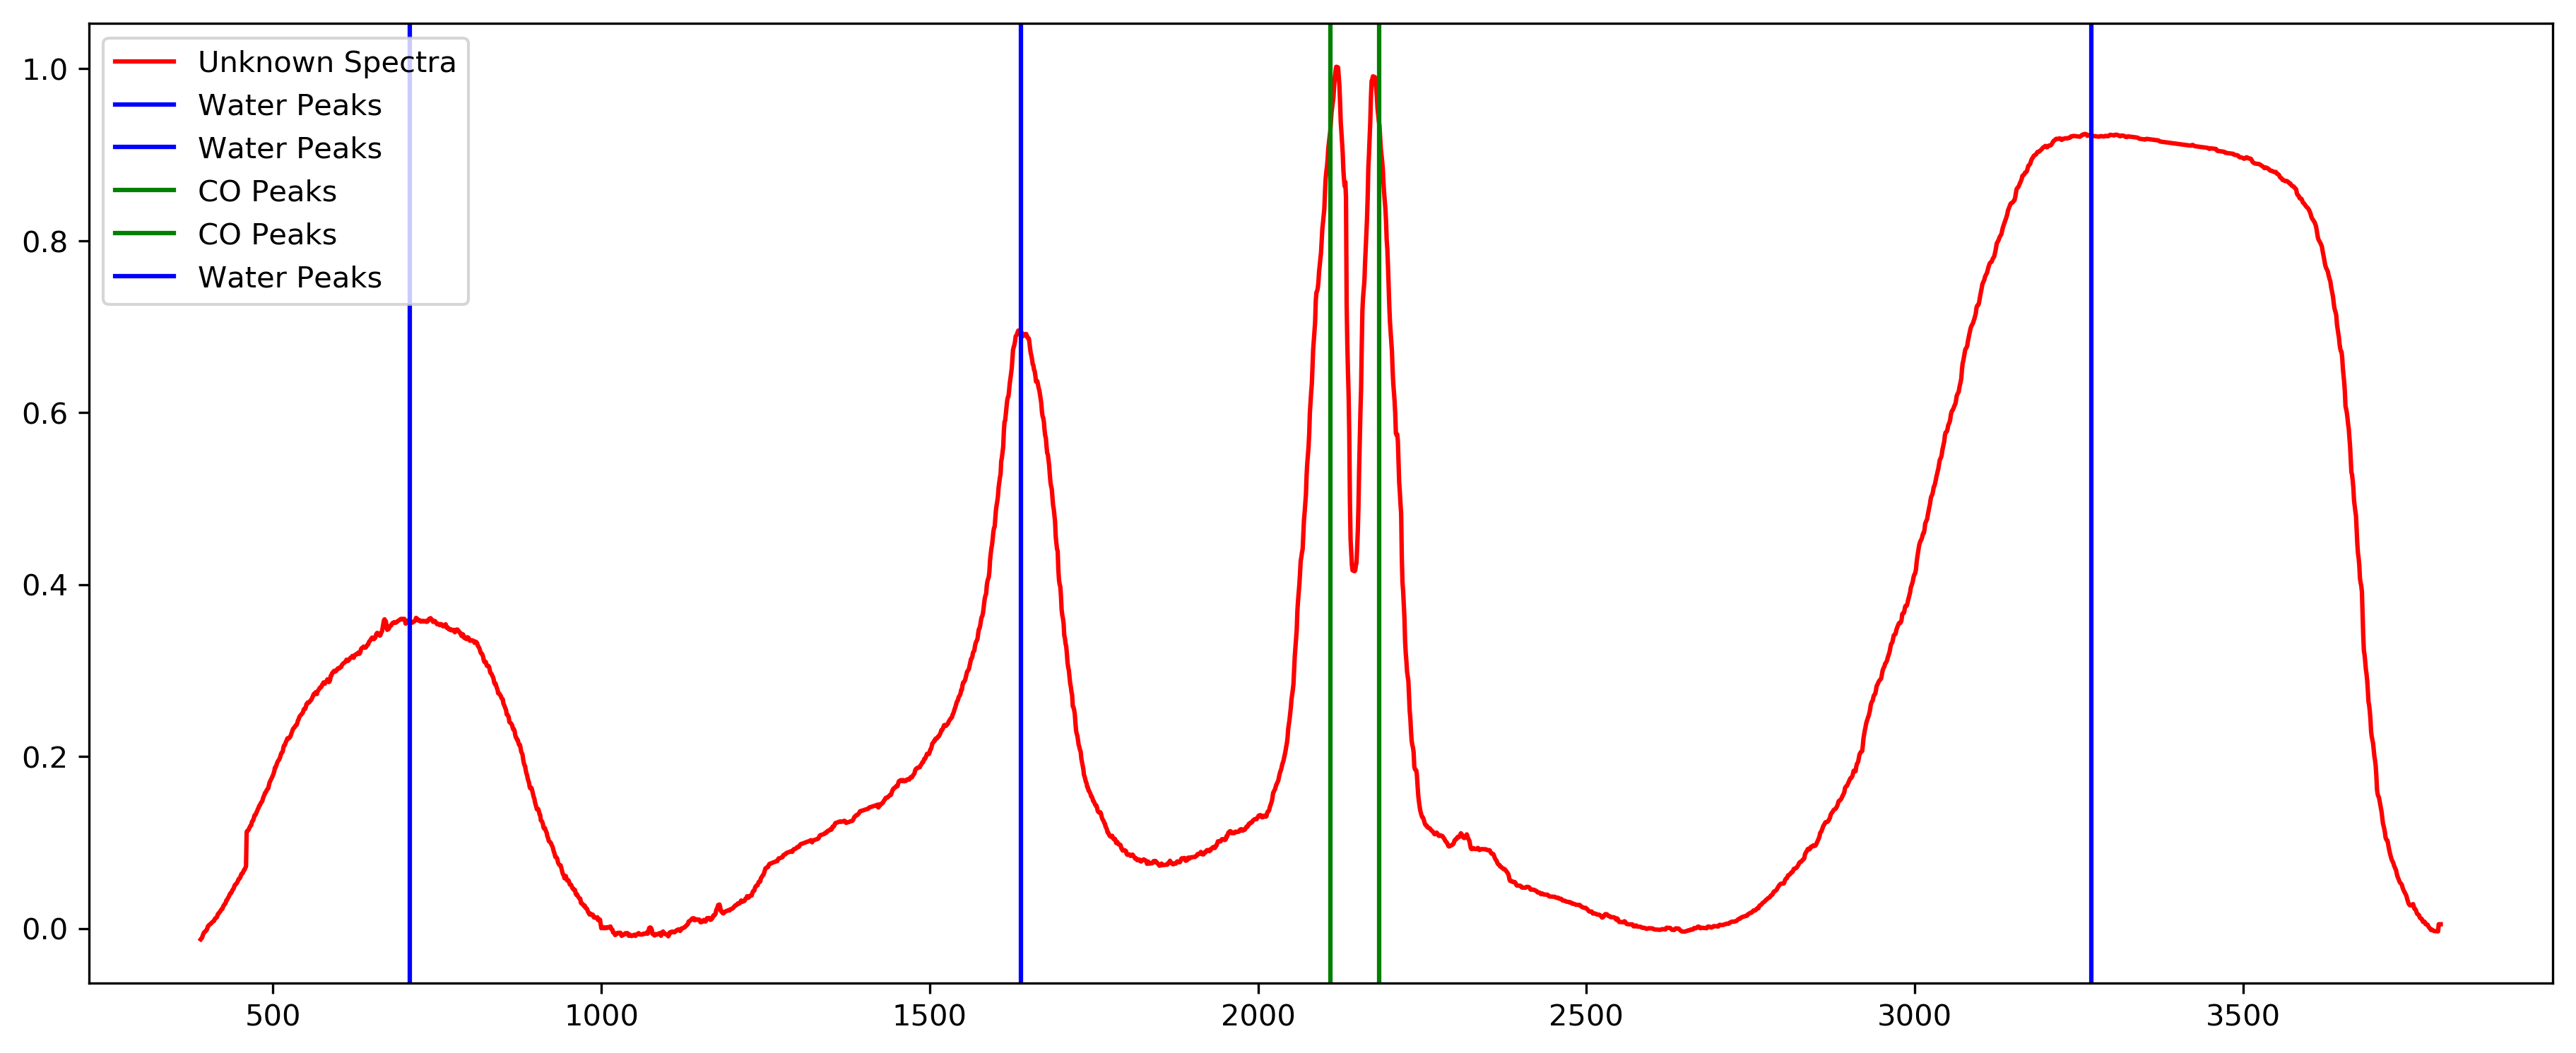

In [19]:
#Ok, now that we have which peaks belong to which component, we'll need to plot their position.
fig = plt.figure(figsize=(15,6), dpi = 300)
plt.plot(H2O_CO_x, H2O_CO_y, color = 'red', label = 'Unknown Spectra')
for i in range(len(H2O_CO_peaks)):
    if water_assignment_matrix[i] == 1:
        plt.axvline(x = H2O_CO_peaks[i], color = 'blue', label = 'Water Peaks')
    if co_assignment_matrix[i] == 1:
        plt.axvline(x = H2O_CO_peaks[i], color = 'green', label = 'CO Peaks')
plt.legend()    
    
#     plt.axvline(x=H2O_CO_x[i], color='orange')


In [ ]:
fig = plt.figure(figsize=(15,6), dpi = 300)
plt.plot(x_data, y_data)
for i in peak_list[0]:
    plt.axvline(x=x_data[i], color='orange')